In [1]:
import uproot3 as up 
import numpy as np
from skimage import transform
from pylab import figure, cm
from matplotlib.colors import LogNorm

In [2]:
ttbar_events = up.open("/data/rohin/ttbar_Akt10.root")['ntuple']
ztt_events   = up.open("/data/rohin/ztt_Akt10.root")['ntuple']

ttbar_events.keys()

[b'AntiKt10LCTopoLeadJets_partonTruthLabel',
 b'AntiKt10LCTopoLeadJets_pt',
 b'AntiKt10LCTopoLeadJets_nConstitutents',
 b'AntiKt10LCTopoLeadJets_eta',
 b'AntiKt10LCTopoLeadJets_phi',
 b'AntiKt10LCTopoLeadJets_clus_calE',
 b'AntiKt10LCTopoLeadJets_clus_calEta',
 b'AntiKt10LCTopoLeadJets_clus_calPhi',
 b'AntiKt10LCTopoSubLeadJets_partonTruthLabel',
 b'AntiKt10LCTopoSubLeadJets_pt',
 b'AntiKt10LCTopoSubLeadJets_nConstitutents',
 b'AntiKt10LCTopoSubLeadJets_eta',
 b'AntiKt10LCTopoSubLeadJets_phi',
 b'AntiKt10LCTopoSubLeadJets_clus_calE',
 b'AntiKt10LCTopoSubLeadJets_clus_calEta',
 b'AntiKt10LCTopoSubLeadJets_clus_calPhi']

In [3]:
df_tt   = ttbar_events.pandas.df(flatten=False)
df_ztt  = ztt_events.pandas.df(flatten=False)

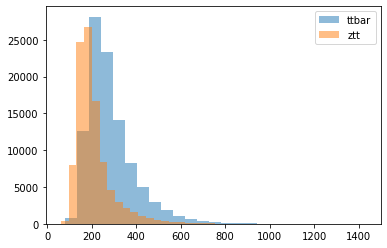

In [4]:
import matplotlib.pyplot as plt
plt.hist(df_tt['AntiKt10LCTopoLeadJets_pt']/1e3,bins=25,alpha=0.5,label='ttbar')
plt.hist(df_ztt['AntiKt10LCTopoLeadJets_pt']/1e3,bins=25,alpha=0.5,label='ztt')
plt.legend()
plt.savefig("pt.png")

In [5]:
df_ttSel = df_tt[df_tt['AntiKt10LCTopoLeadJets_pt']/1e3 > 100]
df_zttSel= df_ztt[df_ztt['AntiKt10LCTopoLeadJets_pt']/1e3 > 100]

In [7]:
#plt.hist(df_ttSel["AntiKt10LCTopoLeadJets_clus_calEta"])

In [8]:
def saveimage(df,imName):
    #translate
    leading_jet_images
    x = pixel_edges()
    df_ttSel[['modEta','modPhi']] = translate(df_ttSel,['AntiKt10LCTopoLeadJets_clus_calEta',
                                                  'AntiKt10LCTopoLeadJets_clus_calPhi']).tolist()
    df_zttSel[['modEta','modPhi']] = translate(df_zttSel,['AntiKt10LCTopoLeadJets_clus_calEta',
                                                  'AntiKt10LCTopoLeadJets_clus_calPhi']).tolist()

def translate(df,cols):
    '''Convert selected df with selected columns into 
    numpy arrays'''
    arrays = np.array([df[x] for x in cols])
    '''Create a return vector of exactly the same shape
    as the input'''
    ret      = np.zeros((arrays.shape),dtype=object)

    
    '''Loop over the column names and subtract from every entry, the leading entry'''
    for i,aCol in enumerate(cols):
        col0 = arrays[i,:,:,][:,0]
        ret[i,:] = (arrays[i,] - col0[:,np.newaxis])

    return ret


def pixel_edges(jet_size=1.0, pixel_size=(0.1, 0.1), border_size=0.5):
    """Return pixel edges required to contain all clusters.
    border_size is interpreted as a fraction of the jet_size
    """
    im_edge = (1. + border_size) * jet_size
    return (np.arange(-im_edge, im_edge+pixel_size[0], pixel_size[0]),
            np.arange(-im_edge, im_edge+pixel_size[1], pixel_size[1]))

def pixelize(jet_csts, edges, cutoff=0.1):
    """Return eta-phi histogram of transverse energy deposits.
    Optionally set all instensities below cutoff to zero.
    """
    image, _, _ = np.histogram2d(
        jet_csts['modEta'], jet_csts['modPhi'],
        bins=(edges[0], edges[1]),
        weights=jet_csts['AntiKt10LCTopoSubLeadJets_clus_calE'] * (jet_csts['AntiKt10LCTopoSubLeadJets_clus_calE'] > cutoff))
    return image

def pixelize2(data, edges, cutoff=0.1):
    """Return eta-phi histogram of transverse energy deposits.
    Optionally set all instensities below cutoff to zero.
    """
    image, _, _ = np.histogram2d(
        data[0],data[1],
        bins=(edges[0], edges[1]),
        weights=data[2] * (data[2] > cutoff))
    return image

def getJetImages(df):
    eta = translate(df,['AntiKt10LCTopoLeadJets_clus_calEta','AntiKt10LCTopoLeadJets_clus_calPhi'])[0]
    phi = translate(df,['AntiKt10LCTopoLeadJets_clus_calEta','AntiKt10LCTopoLeadJets_clus_calPhi'])[1]
    eng = df.AntiKt10LCTopoLeadJets_clus_calE.values
    
    edges = pixel_edges()
    li_images = []
    for i in range(eta.shape[0]):
        li_images.append(pixelize2([eta[i],phi[i],eng[i]],edges))
    return li_images

def normalize(histo, multi=255):
    """
    Normalize picture in [0,multi] range, with integer steps. E.g. multi=255 for 256 steps.
    """
    return (histo/np.max(histo)*multi).astype(int)

In [9]:
x = pixel_edges()
df_ttSel[['modEta','modPhi']] = translate(df_ttSel,['AntiKt10LCTopoLeadJets_clus_calEta',
                                                  'AntiKt10LCTopoLeadJets_clus_calPhi']).tolist()

df_zttSel[['modEta','modPhi']] = translate(df_zttSel,['AntiKt10LCTopoLeadJets_clus_calEta',
                                                  'AntiKt10LCTopoLeadJets_clus_calPhi']).tolist()



/home/rnarayan/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rnarayan/.conda/envs/hls4ml/lib/python3.7/site-packages/pandas/core/indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)
/home/rnarayan/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value i

In [10]:
li_ttImgs  = getJetImages(df_ttSel)
li_zttImgs = getJetImages(df_zttSel)
np.savez_compressed('tt_leading_jet.npz', li_ttImgs)
np.savez_compressed('ztt_leading_jet.npz',li_zttImgs)

In [11]:
img1 = np.average(li_ttImgs,axis=0)
img2 = np.average(li_zttImgs,axis=0)

In [12]:
img1 = normalize(img1)
img2 = normalize(img2)

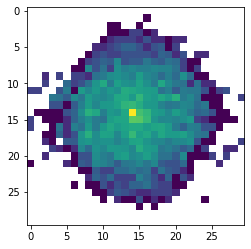

In [13]:
cmap = plt.get_cmap('gray')
import matplotlib
plt.imshow(img1,norm=matplotlib.colors.LogNorm())#,cmap=cmap)

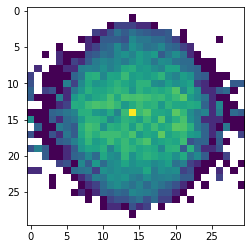

In [14]:
plt.imshow(img2,norm=matplotlib.colors.LogNorm())#,cmap=cmap)

In [16]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
x_data = np.concatenate((np.array(li_ttImgs), np.array(li_zttImgs)))
x_data = x_data.reshape(x_data.shape + (1,)).astype('float32')
x_data /= 255.
y_data = np.array([0]*len(li_ttImgs)+[1]*len(li_zttImgs))
y_data = keras.utils.to_categorical(y_data, 2)

print(len(li_ttImgs))
print(len(li_zttImgs))
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.33, random_state=42)

import h5py
h5 = h5py.File('jetImages.h5','w')
h5.create_dataset("x_train",data=x_train)
h5.create_dataset("x_test",data=x_test)
h5.create_dataset("y_train",data=y_train)
h5.create_dataset("y_test",data=y_test)
h5.close()

99856
99297
